In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("./FPData2.csv")
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
y = df.groupby('Country').count()
less = y[y['year'] <= 10].index.tolist()
df_update = df[~df['Country'].isin(less)]
year_list = range(2011, 2020)
df_11 = df_update[df_update['year'].isin(year_list)]
y1 = df_11.groupby('Country').count()
less1 = y1[y1['year'] <= 8].index.tolist()
df_update1 = df_11[~df_11['Country'].isin(less1)]
df_update2 = df_update1.dropna()
df_update2

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
...,...,...,...,...,...,...,...,...,...,...,...
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212


In [2]:
df_update2.describe()

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,2014.997859,5.501757,9.427555,0.815796,63.943110,0.754562,-0.018889,0.749628,0.651270,0.274328
std,2.581988,1.130087,1.111503,0.116052,6.184646,0.134372,0.154533,0.184038,0.108565,0.079303
min,2011.000000,2.375000,5.527000,0.420000,46.400000,0.333000,-0.338000,0.078000,0.308000,0.103000
25%,2013.000000,4.690250,8.531250,0.751000,59.818750,0.658000,-0.129000,0.698000,0.564250,0.213000
50%,2015.000000,5.484000,9.580000,0.844500,65.410000,0.773000,-0.045000,0.806000,0.660000,0.268000
75%,2017.000000,6.319750,10.310750,0.909000,69.036250,0.865750,0.072750,0.870750,0.741000,0.327000
max,2019.000000,7.858000,11.664000,0.987000,74.100000,0.985000,0.552000,0.977000,0.884000,0.552000


In [3]:
happy = np.array(df_update2.iloc[:,2]).reshape(-1,1)
X = np.array(df_update2.iloc[:,[3,4,5,6,7, 8, 9,10]])
X_train, X_test, y_train, y_test = train_test_split(X,happy,test_size = 0.30)

In [4]:
model = LinearRegression().fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test, y_test))

0.7978167286116893
0.7631984061299038


In [5]:
np.cov(X)

array([[317.982252  , 319.553511  , 321.62092686, ..., 322.18453229,
        325.08340643, 328.18546529],
       [319.553511  , 321.13436112, 323.210596  , ..., 323.77687795,
        326.68913962, 329.80682096],
       [321.62092686, 323.210596  , 325.30524114, ..., 325.87772514,
        328.80955729, 331.94576129],
       ...,
       [322.18453229, 323.77687795, 325.87772514, ..., 326.47179927,
        329.40564102, 332.54441104],
       [325.08340643, 326.68913962, 328.80955729, ..., 329.40564102,
        332.36832041, 335.53592439],
       [328.18546529, 329.80682096, 331.94576129, ..., 332.54441104,
        335.53592439, 338.73820336]])

<ipython-input-6-ae3d08e415ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_update2.corr(), annot=True)


<AxesSubplot:>

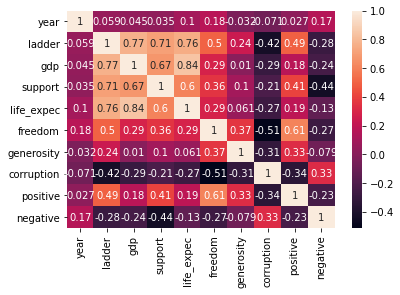

In [6]:
sns.heatmap(df_update2.corr(), annot=True)

In [7]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
feature_vars = df_update2.columns[3:11]
feature_vars

Index(['gdp', 'support', 'life_expec', 'freedom', 'generosity', 'corruption',
       'positive', 'negative'],
      dtype='object')

In [34]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, happy)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X, happy)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, happy)

In [35]:
sfs_forward.get_support()
feature_vars[sfs_forward.get_support()]

Index(['gdp', 'positive'], dtype='object')

In [36]:
happy = np.array(df_update2.iloc[:,2]).reshape(-1,1)
X1 = np.array(df_update2.iloc[:,[3,9]])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,happy,test_size = 0.30)
model2 = LinearRegression().fit(X_train1,y_train1)

print(model2.score(X_train1,y_train1))
print(model2.score(X_test1, y_test1))
X

0.7375642103012634
0.6975512131689657


array([[ 7.581,  0.521, 51.4  , ...,  0.731,  0.48 ,  0.267],
       [ 7.661,  0.521, 51.7  , ...,  0.776,  0.614,  0.268],
       [ 7.68 ,  0.484, 52.   , ...,  0.823,  0.547,  0.273],
       ...,
       [ 7.754,  0.754, 52.15 , ...,  0.751,  0.734,  0.224],
       [ 7.783,  0.775, 52.625, ...,  0.844,  0.658,  0.212],
       [ 7.698,  0.759, 53.1  , ...,  0.831,  0.658,  0.235]])

In [41]:
import pycountry_convert as pc

def continent(name):
    part1 = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(part1)
    continent = pc.convert_continent_code_to_continent_name(code)
    return continent



In [60]:
df_update2 = df_update2.drop(columns='Congo (Brazzaville)')

In [68]:
df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})

In [71]:
df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)
df_update2

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268,Asia
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273,Asia
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375,Asia
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179,Africa
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209,Africa
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224,Africa
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212,Africa
